In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
credits= pd.read_csv('tmdb_5000_credits.csv')
credits.rename(columns=lambda x: x.strip(), inplace=True)
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.rename(columns=lambda x: x.strip(), inplace=True)

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['iso_3166_1']))
    movies.loc[index,'production_countries']=str(list1)

movies['spoken_languages']=movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['iso_639_1']))
    movies.loc[index,'spoken_languages']=str(list1)
    
    
# changing the cast column from json to string
credits['cast']=credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
credits['crew']=credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew']=credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [7]:
movies=movies.merge(credits,left_on='id',right_on='movie_id',how='left')

In [8]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'GB']",2009-12-10,2787965087,162.0,"['en', 'es']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['US'],2007-05-19,961000000,169.0,['en'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['GB', 'US']",2015-10-26,880674609,148.0,"['fr', 'en', 'es', 'it', 'de']",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['US'],2012-07-16,1084939099,165.0,['en'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['US'],2012-03-07,284139100,132.0,['en'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton
5,258000000,"['Fantasy', 'Action', 'Adventure']",http://www.sonypictures.com/movies/spider-man3/,559,"['dual identity', 'amnesia', 'sandstorm', ""lov...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"['Columbia Pictures', 'Laura Ziskin Production...",['US'],2007-05-01,890871626,139.0,"['en', 'fr']",Released,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",Sam Raimi
6,260000000,"['Animation', 'Family']",http://disney.go.com/disneypictures/tangled/,38757,"['hostage', 'magic', 'horse', 'fairy tale', 'm...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"['Walt Disney Pictures', 'Walt Disney Animatio...",['US'],2010-11-24,591794936,100.0,['en'],Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",Byron Howard
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"['marvel comic', 'sequel', 'superhero', 'based...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['US'],2015-04-22,1405403694,141.0,['en'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.

In [9]:
movies['profit_per']= round(abs(movies['budget']-movies['revenue'])/movies['budget']*100)

In [126]:
movies = movies[(movies['vote_average']!=0)]

In [132]:
movies2 = movies[(movies['budget']!=0) & (movies['revenue']!=0)].copy().reset_index()

In [133]:
movies2.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,profit_per
3222,4773,27000,['Comedy'],http://www.miramax.com/movie/clerks/,2292,"['salesclerk', 'loser', 'aftercreditsstinger']",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"['Miramax Films', 'View Askew Productions']",['US'],1994-09-13,3151130,92.0,['en'],Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,2292,Clerks,"[""Brian O'Halloran"", 'Jeff Anderson', 'Jason M...",Kevin Smith,11571.0
3223,4788,12000,"['Horror', 'Comedy', 'Crime']",NaN,692,"['gay', 'trailer park', 'pop culture', 'drug d...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,['Dreamland Productions'],['US'],1972-03-12,6000000,93.0,['en'],Released,An exercise in poor taste.,Pink Flamingos,6.2,110,692,Pink Flamingos,"['Divine', 'David Lochary', 'Mary Vivian Pearc...",John Waters,49900.0
3224,4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",NaN,36095,"['japan', 'prostitute', 'hotel', 'based on nov...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,['Daiei Studios'],['JP'],1997-11-06,99000,111.0,['ja'],Released,Madness. Terror. Murder.,Cure,7.4,63,36095,Cure,"['Koji Yakusho', 'Masato Hagiwara', 'Tsuyoshi ...",Kiyoshi Kurosawa,395.0
3225,4796,7000,"['Science Fiction', 'Drama', 'Thriller']",http://www.primermovie.com,14337,"['distrust', 'garage', 'identity crisis', 'tim...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,['Thinkfilm'],['US'],2004-10-08,424760,77.0,['en'],Released,What happens if it actually works?,Primer,6.9,658,14337,Primer,"['Shane Carruth', 'David Sullivan', 'Casey Goo...",Shane Carruth,5968.0
3226,4798,220000,"['Action', 'Crime', 'Thriller']",NaN,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],"['MX', 'US']",1992-09-04,2040920,81.0,['es'],Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",Robert Rodriguez,828.0


In [134]:
movies2['success'] = movies2['profit_per'].apply(lambda x: 1 if x > 50 else 0)

In [135]:
def cleanData(x):
    movies2[x]=movies2[x].str.strip('[]').str.replace(' ','').str.replace("'",'')
    movies2[x]=movies2[x].str.split(',')


In [136]:
cleanData('genres')
cleanData('keywords')
cleanData('production_countries')
cleanData('production_companies')
cleanData('spoken_languages')
cleanData('cast')


In [138]:
def valList(x):
    List = []
    for index, row in movies2.iterrows():
        vals = row[x]
        
        for val in vals:
            if val not in List:
                List.append(val)
    return List     

In [139]:
genreList = valList('genres')
kwordList = valList('keywords')
prodCtryList = valList('production_countries')
prodCpanyList = valList('production_companies')
langList = valList('spoken_languages')
castList = valList('cast')

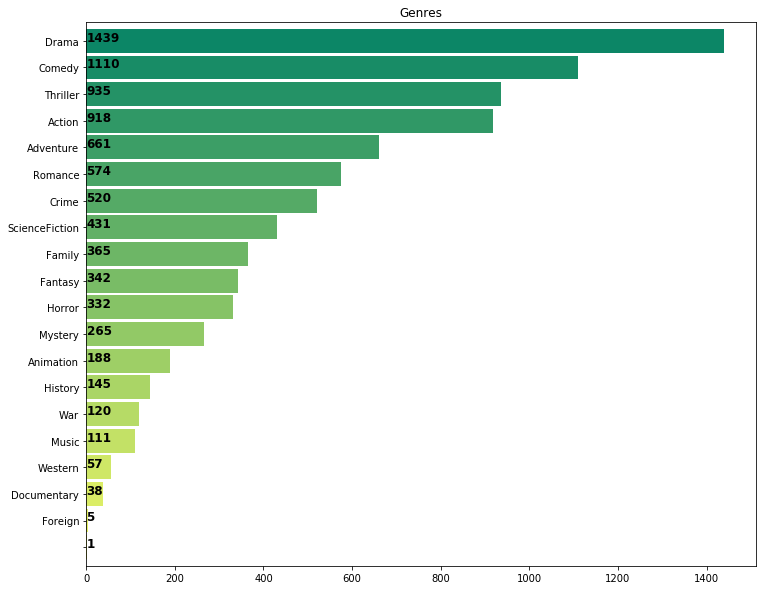

In [140]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies2['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',20))
for i, v in enumerate(pd.Series(list1).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
plt.title('Genres')
plt.show()

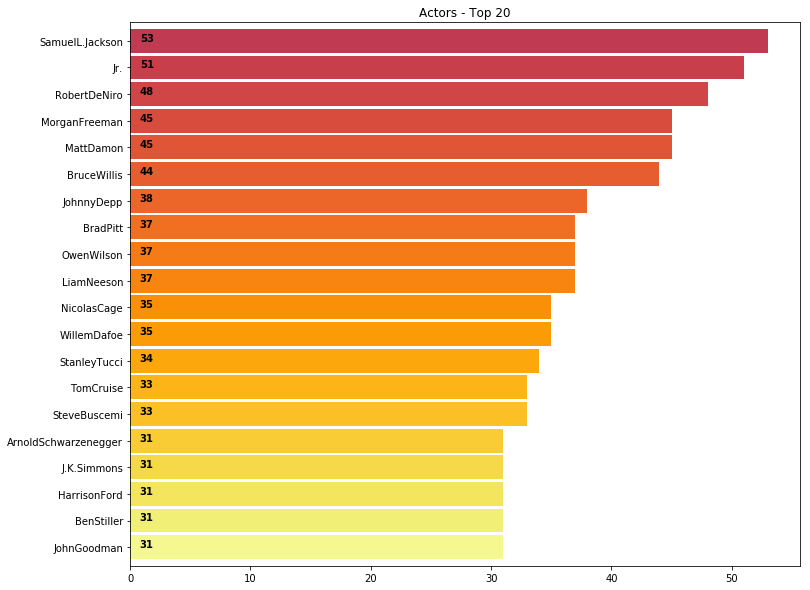

In [141]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies2['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Actors - Top 20')
plt.show()

In [142]:
def binary(x,xlist):
    binaryList = []
    
    for list2 in xlist:
        if list2 in x:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [143]:
movies2['gen_bin'] = movies2['genres'].apply(lambda x: binary(x,genreList))
movies2['kword_bin'] = movies2['keywords'].apply(lambda x: binary(x,kwordList))
movies2['prodCtry_bin'] = movies2['production_countries'].apply(lambda x: binary(x,prodCtryList))
movies2['prodCpany_bin'] = movies2['production_companies'].apply(lambda x: binary(x,prodCpanyList))
movies2['lang_bin'] = movies2['spoken_languages'].apply(lambda x: binary(x,langList))
movies2['cast_bin'] = movies2['cast'].apply(lambda x: binary(x,castList))

In [144]:
movies2

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director,profit_per,success,gen_bin,kword_bin,prodCtry_bin,prodCpany_bin,lang_bin,cast_bin
0,0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[US, GB]",2009-12-10,2787965087,162.0,"[en, es]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,1076.0,1,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[US],2007-05-19,961000000,169.0,[en],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,220.0,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[GB, US]",2015-10-26,880674609,148.0,"[fr, en, es, it, de]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,259.0,1,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[US],2012-07-16,1084939099,165.0,[en],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,334.0,1,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[US],2012-03-07,284139100,132.0,[en],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,9.0,0,"[1, 1

In [145]:
movies3=movies2[['original_title','budget','popularity', 'revenue', 'vote_average', 'vote_count', 'gen_bin','kword_bin','prodCtry_bin','prodCpany_bin','lang_bin','cast_bin','profit_per','success']].copy()

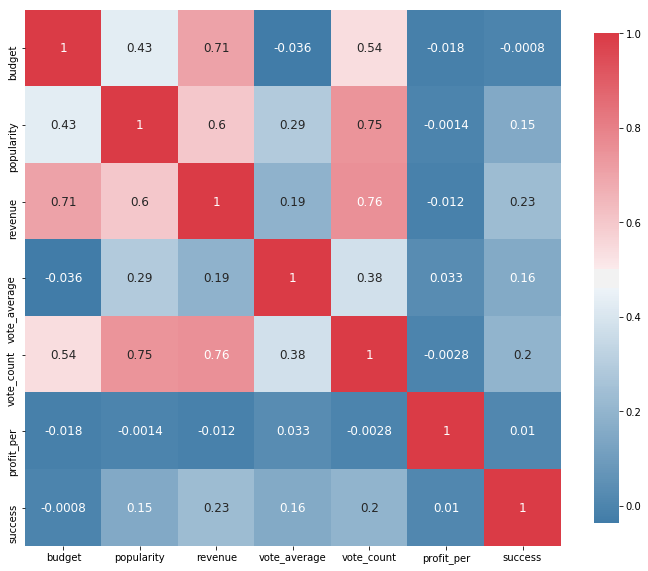

In [146]:
corr = movies3.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
_ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

In [125]:
movies3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 13 columns):
original_title    3229 non-null object
budget            3229 non-null int64
popularity        3229 non-null float64
revenue           3229 non-null int64
vote_average      3229 non-null float64
vote_count        3229 non-null int64
gen_bin           3229 non-null object
kword_bin         3229 non-null object
prodCtry_bin      3229 non-null object
prodCpany_bin     3229 non-null object
lang_bin          3229 non-null object
cast_bin          3229 non-null object
profit_per        3229 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 328.0+ KB


In [147]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies2['genres'])


AttributeError: 'list' object has no attribute 'lower'

In [150]:
tfidf_matrix

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [151]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

array([[1.        , 0.36651513, 0.52305744, 0.13448867]])

In [152]:
tfidf_matrix[0:1]

<1x11 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>